In [38]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv("USA_Housing.csv")

In [3]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
bins=[1,3,5,7,9,11]
data["binning"]=pd.cut(data["Avg. Area House Age"],bins)

In [5]:
print(data.head())

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address binning  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  (5, 7]  
1  188 Johnson Views Suite 079\nLake Kathleen, CA.

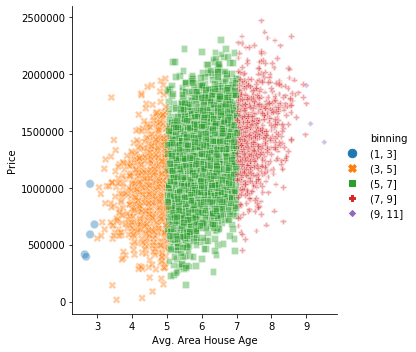

In [15]:
sns.relplot(x="Avg. Area House Age",y="Price",data=data,hue="binning",size="binning",style="binning",alpha=0.4,kind="scatter",ci=None)

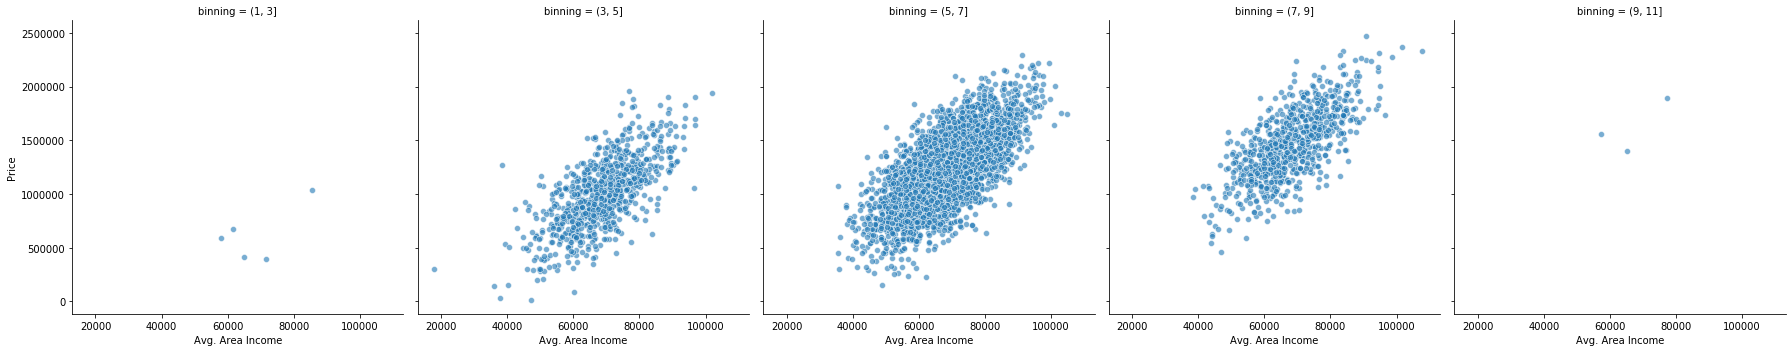

In [25]:
sns.relplot(x="Avg. Area Income",y="Price",data=data,col="binning",kind="scatter",ci=None,alpha=0.6)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


In [27]:
data.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [28]:
x=data[["Avg. Area Income","Avg. Area House Age","Area Population","Avg. Area Number of Rooms"]]
y=data["Price"]

In [59]:
polynomial_features= PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(x)
rgr= LinearRegression()
rgr.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
y1=rgr.predict(x_poly)

In [58]:
rmse = np.sqrt(mean_squared_error(y,y1))
r2 = r2_score(y,y1)
print(rmse)
print(r2)


100782.2878846934
0.9185264762005115


In [62]:
print(y)


0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64
[1216244.71050897 1495346.68808539 1260042.79731351 ... 1012381.83836138
 1255380.44200031 1292517.97017305]


In [63]:
y1

array([1216244.71050897, 1495346.68808539, 1260042.79731351, ...,
       1012381.83836138, 1255380.44200031, 1292517.97017305])